# Linear Regression with Python

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.558,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,80000.00,5.00,3.00,2.00,1000000.00,????,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987.988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616.807,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943.4893,USNS Raymond\nFPO AE 09386
5,80175.75,4.99,6.10,4.04,26748.43,1068138.074,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.46,6.03,8.15,3.41,60828.25,1502055.817,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.34,6.99,6.62,2.42,36516.36,1573936.564,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.66,5.36,6.39,2.30,29387.40,798869.5328,USS Gilbert\nFPO AA 20957
9,81885.93,4.42,8.17,6.10,40149.97,1545154.813,Unit 9446 Box 0958\nDPO AE 97025


In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null object
Address                         5000 non-null object
dtypes: float64(5), object(2)
memory usage: 273.6+ KB


In [5]:
USAhousing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,68583.259222,10658.146933,17796.63,61480.565,68804.285,75783.3425,107701.75
Avg. Area House Age,5000.0,5.977078,0.991534,2.64,5.320,5.970,6.6500,9.52
Avg. Area Number of Rooms,5000.0,6.987024,1.007372,3.00,6.300,7.000,7.6700,10.76
Avg. Area Number of Bedrooms,5000.0,3.981112,1.234391,2.00,3.140,4.050,4.4900,6.50
Area Population,5000.0,36355.481474,16861.547238,172.61,29403.930,36199.405,42874.1425,1000000.00


In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

Let's create some simple plots to check out the data!

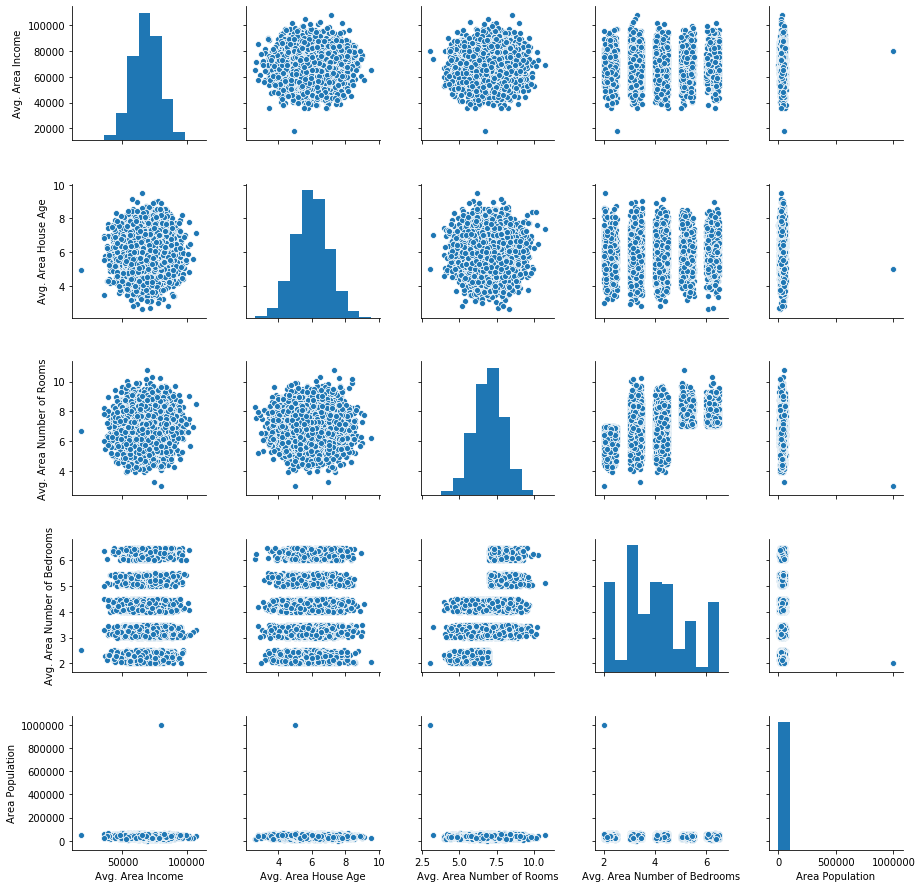

In [7]:
sns.pairplot(USAhousing)

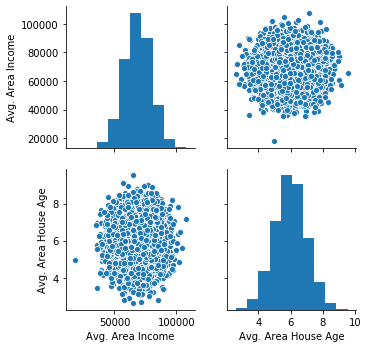

In [8]:
sns.pairplot(USAhousing[['Avg. Area Income', 'Avg. Area House Age']])

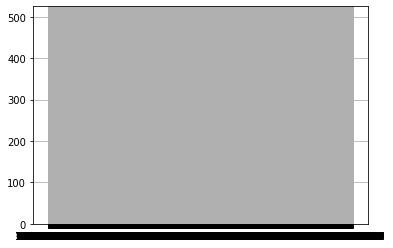

In [9]:
USAhousing['Price'].hist()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

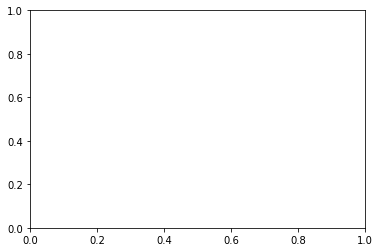

In [10]:
sns.distplot(USAhousing['Price'])   #KDE PLOTS

In [ ]:
USAhousing.corr()

In [ ]:
sns.heatmap(USAhousing.corr(), cmap="YlGnBu")

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [ ]:
X = USAhousing.drop('Price', axis=1)

In [ ]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [ ]:
USAhousing.drop(1,axis=0, inplace=True)

In [ ]:
X = USAhousing.iloc[:,:5]
y = USAhousing.iloc[:,5]

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
np.random.seed(101)

In [ ]:
np.random.rand()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,\
                                                    random_state=101)

## Creating and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
history = lm.fit(X_train,y_train)  # training step

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [ ]:
# print the intercept
print(lm.intercept_)

In [ ]:
lm.coef_

In [ ]:
coeff_df = pd.DataFrame(lm.coef_, index=X.columns,\
                        columns=['Coefficient'])
coeff_df

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because its a made up data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



In [ ]:
from sklearn.datasets import load_boston #this is comment
boston = load_boston()
print(boston.DESCR)
boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [39]:
predictions = lm.predict(X_test)

In [40]:
plt.scatter(y_test,predictions)

Error in callback <function flush_figures at 0x000001F2A37DC378> (for post_execute):


KeyboardInterrupt: 

In [43]:
from sklearn.metrics import r2_score

In [44]:
r_sq = r2_score(y_test,predictions)
r_sq

0.9208025699791778

**Residual Histogram**

In [53]:
y_test

1719    1882806.934
2512    846055.7174
346     1414286.724
2522    1302029.013
55      1159596.519
           ...     
3413    1305210.265
4020    1254938.142
4635    1434323.825
1701    1242114.101
791     783566.3279
Name: Price, Length: 1500, dtype: object

In [52]:
residuals = y_test.values-predictions

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [47]:
plt.plot(y_test-predictions,'bo')

TypeError: unsupported operand type(s) for -: 'str' and 'float'

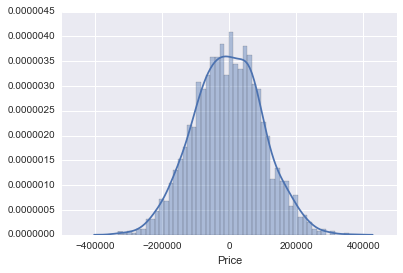

In [0]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [54]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 80509.97200751374
MSE: 10099008761.227064
RMSE: 100493.82449298595
